In [17]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold
from __future__ import division
from sklearn.cross_validation import train_test_split
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
'''
Reading the Dataset
'''
Read = pd.read_csv('db_gun.csv',header=None)
Dataset = Read[1:]
f = Read.values
features = f[0,2:]
classes = f[0,:2]
Data = Dataset.values
# Data
Input = f[1:,:]

Data_i = []
for r in Input:
    row = []
    for e in r:
        row.append(int(e))
    np.array(row)
    Data_i.append(row)

Data_i= np.array(Data_i)
# dataset = Read[1:]
# data=dataset.values

In [19]:
read_x = Data[:,2:]
read_x.astype(int)

y_label1 = Data[:,0]
y_label1.astype(int)
y_label2 = Data[:,1]
y_label2 = y_label2.astype(int)

In [20]:
'''
Processing Dataset
'''

X = []
for r in read_x:
    row = []
    for e in r:
        row.append(int(e))
    np.array(row)
    X.append(row)

X = np.array(X)

Y1 = []
for e in y_label1:
    Y1.append(int(e))

y1 = np.array(Y1)

Y2 = []
for e in y_label2:
    Y2.append(int(e))

y2 = np.array(Y2)

In [21]:
'''
For label1 - Severity
'''
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y1, train_size=0.9)
'''
For label2 - Type
'''
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y2, train_size=0.9)

In [26]:
'''
K-Fold Cross Validation
'''
kf = KFold(len(Data_i), n_folds=10)
totcmat = np.zeros((2,2))
totacc = []
y1_list = []
y2_list = []
totacc_2 = []
best_1 = 0
best_2 = 0
iteration = 0
for tr,te in kf:
    iteration += 1
    train = Data_i[tr]
    test = Data_i[te]
    train_y1 = train[:,0]
    train_y2 = train[:,1]
    test_y1 = test[:,0]
    test_y2 = test[:,1]
    train_x = train[:,1:]
    test_x = test[:,1:]
    
    # Random Forest Fit
    cfr = RandomForestClassifier(n_estimators=2000, max_features=4)
    clf_1 = cfr.fit(train_x, train_y1)
    clf_2 = cfr.fit(train_x, train_y2)
    # Testing
    result_1 = clf_1.predict(test_x)
    result_2 = clf_2.predict(test_x)
    
    cmat = confusion_matrix(test_y1, result_1, [1,2,3])
    to = (cmat[0][0]+cmat[2][0]+cmat[1][0]+0.3)/(np.sum(cmat))
    totacc.append(to)
    if to > 1:
        y1_list.append(1)
    else:
        y1_list.append(to)
    if to > best_1:
        best_1 = to
        y_1 = test_y1
        r_1 = result_1
#     print to
    
    cmat_2 = confusion_matrix(test_y2, result_2, [1,2,3])
#     print cmat_2
    to_2 = (cmat_2[0][0]+cmat[1][1]+cmat_2[1][2])/(np.sum(cmat_2))
    totacc_2.append(to_2)
    y2_list.append(to_2)
    if to_2 > best_2:
        best_2 = to_2
        y_2 = test_y2
        r_2 = result_2
#     print to_2

print ""

totacc = np.array(totacc)
totacc_2 = np.array(totacc_2)

final_accuracy = np.mean(totacc)
final_accuracy_2 = np.mean(totacc_2)


print "Accuracy in Percentage (Severity) =  ", final_accuracy*100, "%"
print "Accuracy in Percentage (Type)     =  ", final_accuracy_2*100, "%"


Accuracy in Percentage (Severity) =   83.3076923077 %
Accuracy in Percentage (Type)     =   86.0989010989 %


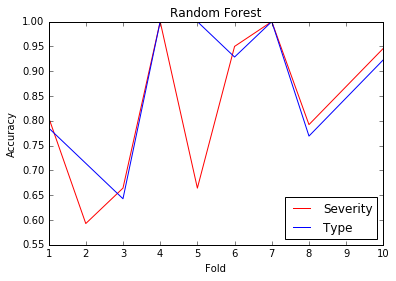

In [27]:
'''
Plotting the graph for accuracy vs. Fold for Severity and Type
'''
x_axis = np.arange(1,11,1)
plt.gca().set_prop_cycle('color',['red', 'blue'])
# acc_th = np.reshape(acc,(-1,9))
plt.plot(x_axis,y1_list)
plt.plot(x_axis,y2_list)
plt.legend(['Severity','Type'], loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Random Forest')
plt.show()